# Visualizations
You may need to adjust the data types to ensure all visualizations are meaningful. However, in this notebook, we are solely focusing on displaying the plots.

For analyzing the target (dependent) variable, a univariate analysis helps understand its distribution. Additionally, bivariate and multivariate analyses can reveal relationships between the target variable and individual features. Some of the appropriate visualization techniques include:
- Numerical Features vs. Numerical Target: Scatterplot,Correlation Heatmap
- Categorical Features vs. Numerical Target: Boxplot
- Categorical Features vs. Categorical Target: Stacked Bar Plot

## Univariate Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')

#### Boxplots for numerical values
They display the distribution of data based on the Interquartile Range (IQR) and highlight points that fall outside the "whiskers" of the plot. it helps to find outliers.


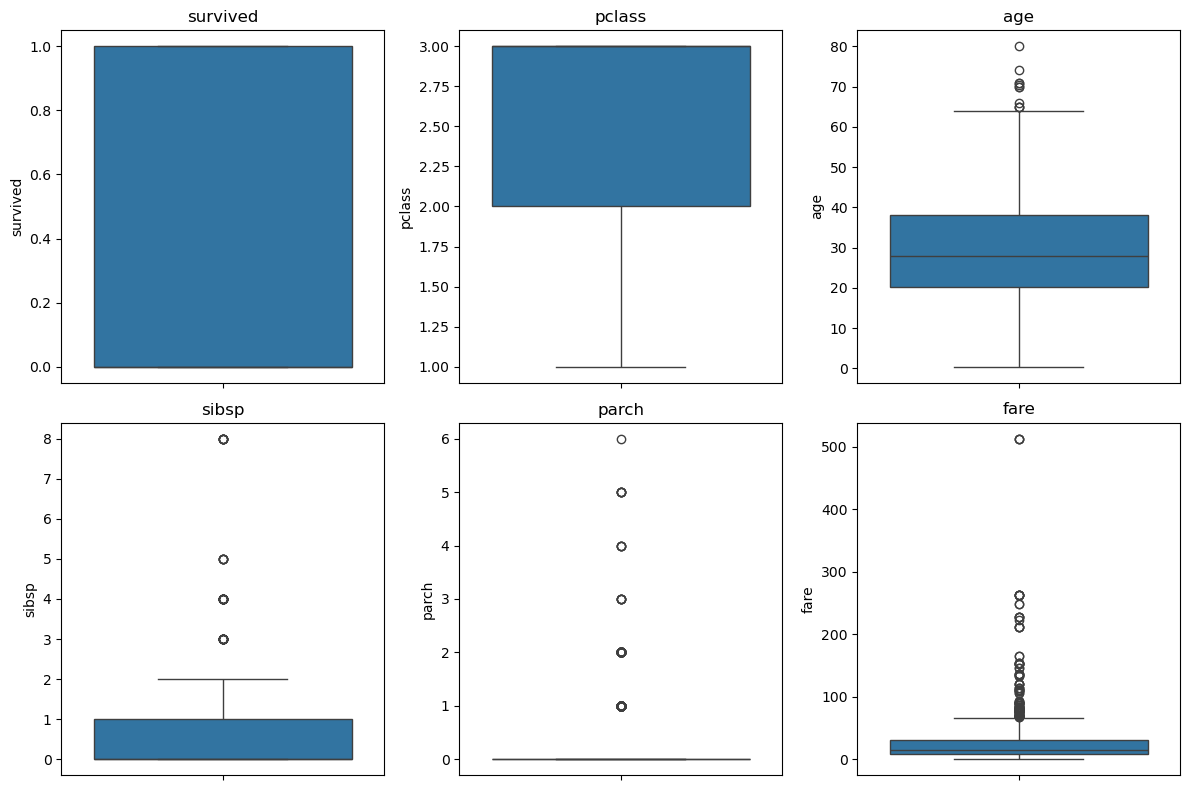

In [5]:
numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

#### Histograms for numerical variables
Show the distribution of numerical data by dividing it into bins and counting the number of observations in each bin. Normally it helps to see if the data is skewed, has outliers, or follows a normal distribution.

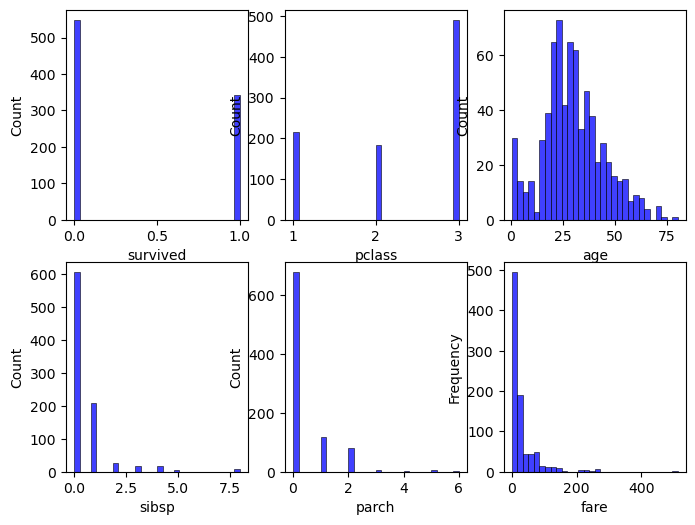

In [14]:
numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(8, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=30, kde=False, color='blue')
    #plt.title(f'Distribution of {column}')
    plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

#### Density Plots for numerical variables
Smoothed versions of histograms and show the probability density function (pdf) of continuos variables. The total area under the density curve is 1, making it a true probability distribution estimate.The y-axis represents probability density, not counts as histograms

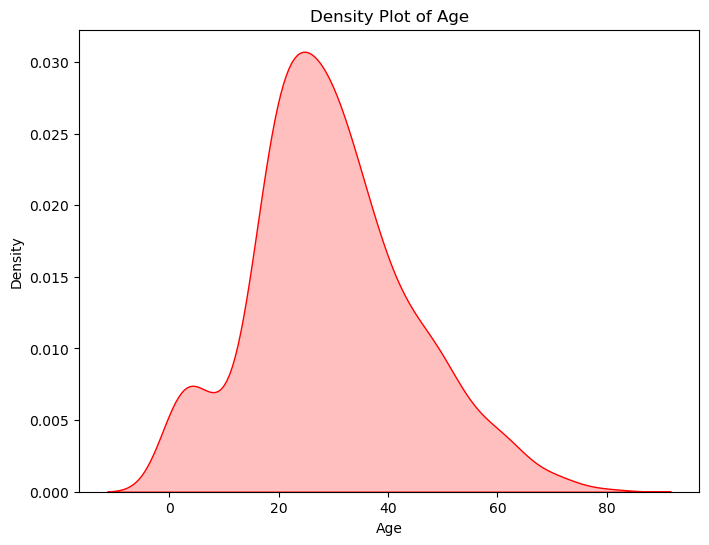

In [11]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['age'], color='red', fill=True)
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

#### Bar Plots for categorical variables

It helps yo understand if the dataset is balanced or imbalanced

/var/folders/x_/gjdjch3n18b_znsmwt0_wm2w0000gn/T/ipykernel_6063/231376851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


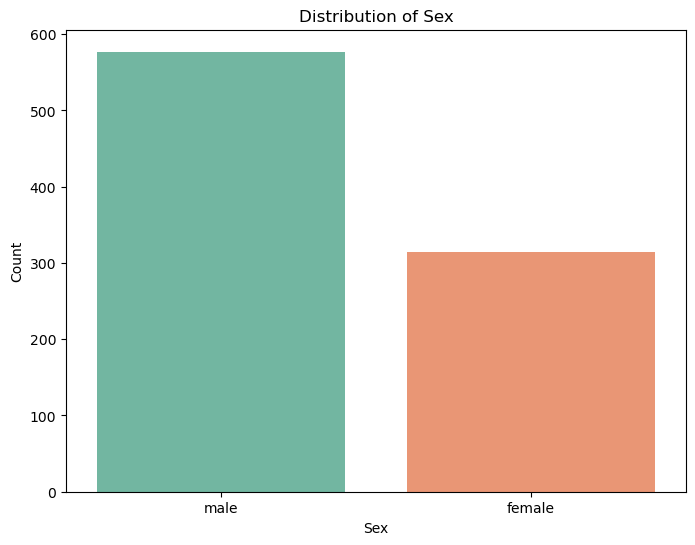

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette='Set2')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

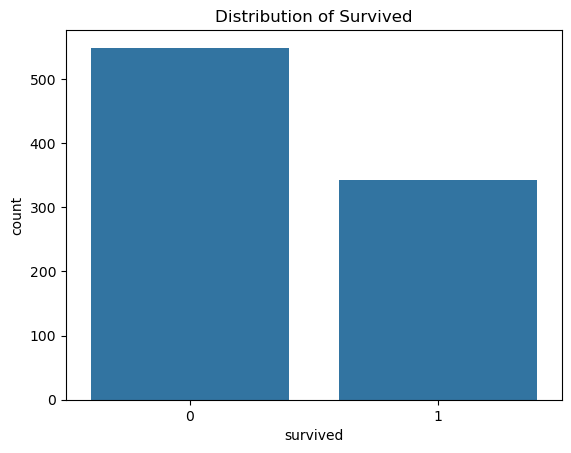

In [50]:
sns.countplot(x='survived', data=df)
plt.title('Distribution of Survived')
plt.show()

#### Decomposing a time series into Trend, Seasonality, and Residual
Time series decomposition helps in removing seasonality and trend from data before using machine learning models like regression, ARIMA, or deep learning models (LSTMs:Long Short-Term Memory (LSTM) Networks: A Deep Learning Model for Time Series Data). Powerful method for understanding and analyzing time series data by breaking it into more manageable and interpretable parts.

By extracting the trend and seasonality, you can train models on the residual component, which often leads to better predictions.We'll use the trend and seasonality components as new features for a regression model to predict future values.

The main components are:
- Trend: This represents the long-term progression in the data (either increasing, decreasing, or constant).
- Seasonality: This represents the repeating short-term patterns or cycles that occur at fixed intervals (e.g., weekly, monthly, or yearly patterns).
- Residual (or Noise): This is the "leftover" part of the data that cannot be explained by the trend or seasonality. It often consists of random fluctuations.

There are two main types of decomposition models:
1.  Additive Decomposition:The model assumes that the components (trend, seasonality, residuals) are added together to form the time series.This model is best used when the amplitude of the seasonality does not change over time (Time Series=Trend+Seasonality+Residual)

2. Multiplicative Decomposition:The model assumes that the components multiply together to form the time series.This model is best when the amplitude of the seasonal fluctuations changes proportionally with the level of the trend (e.g., sales increase proportionally during holiday seasons).(Time Series=Trend×Seasonality×Residual)

Decomposition is useful when:
- You have a time series with clear seasonal patterns.
- You want to isolate the components to better understand them and model them separately.
- You need to assess the noise (residuals) to improve forecasting accuracy.
- You want to detect trends and seasonality before fitting models (e.g., ARIMA, exponential smoothing).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load time series data
df = pd.read_csv("your_timeseries_data.csv", parse_dates=["date"], index_col="date")

# Load dataset (Example: Monthly Sales Data)
df = pd.read_csv("sales_data.csv", parse_dates=["date"], index_col="date")

# Decompose the time series
decomposition = seasonal_decompose(df['sales'], model='additive', period=12)  # Adjust period as needed

# Extract components
df['trend'] = decomposition.trend
df['seasonal'] = decomposition.seasonal
df['residual'] = decomposition.resid

# Drop NaN values caused by decomposition
df.dropna(inplace=True)

# Plot decomposition results
df[['sales', 'trend', 'seasonal', 'residual']].plot(subplots=True, figsize=(12, 8))
plt.show()

## Bivariate Analysis

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')

#### Scatterplots
Used to visualize the relationship between two numerical variables.

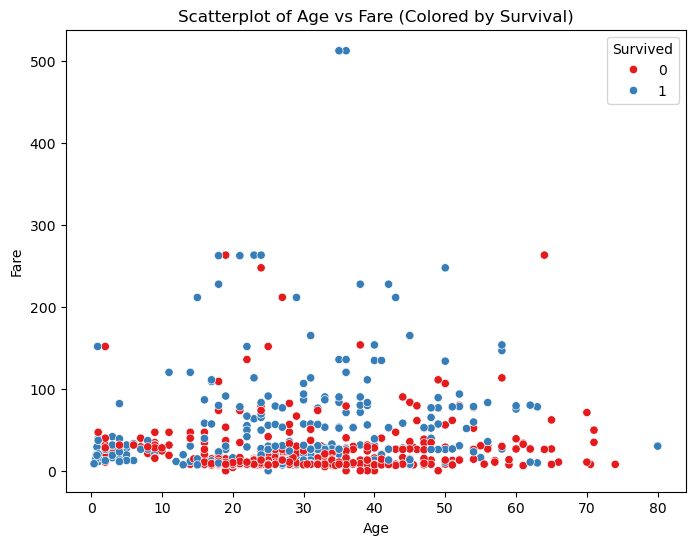

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', data=df, hue='survived', palette='Set1')
plt.title('Scatterplot of Age vs Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

#### Line Plots
Show trends over a continuous variable. The shaded areas around the lines represent the confidence interval (by default, 95% confidence interval-This means that if you were to repeat the same experiment or data collection 100 times, the true mean would fall within the calculated interval in 95 of those experiments.-).

/var/folders/x_/gjdjch3n18b_znsmwt0_wm2w0000gn/T/ipykernel_6063/1899398726.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age', y='fare', data=df, hue='survived', palette='Set1',ci=None)


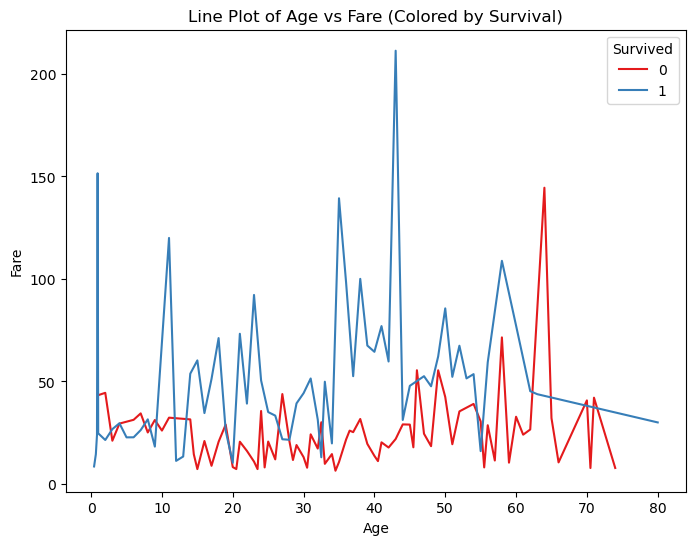

In [32]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='age', y='fare', data=df, hue='survived', palette='Set1') #ci=None take out the areas
plt.title('Line Plot of Age vs Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

#### Heatmaps 
Great for visualizing correlations between numerical variables.
This shows the Pearson correlation coefficients (for linear relationships) between numerical variables.Values close to 1 indicate a strong positive correlation.Values close to -1 indicate a strong negative correlation and values close to 0 indicate no correlation.

You can also select Spearman or Kendall.

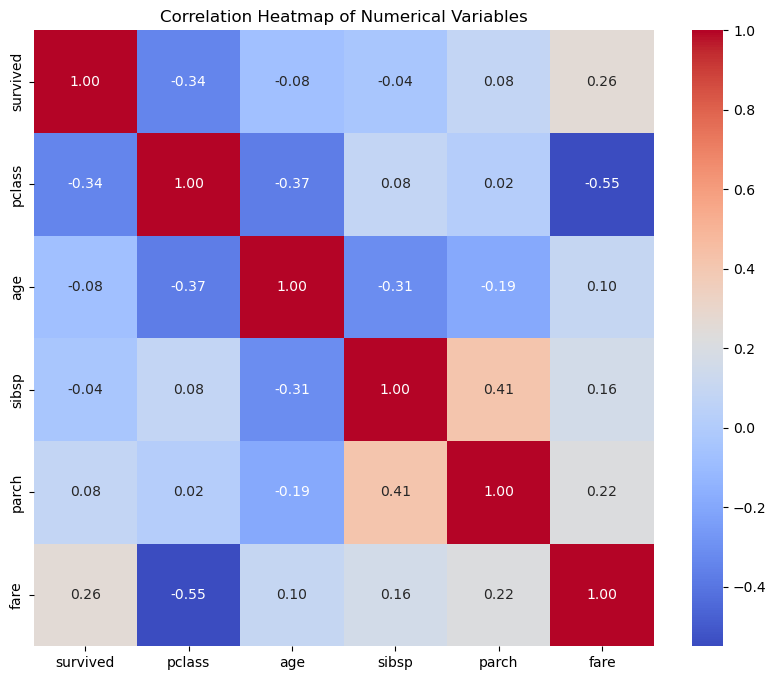

In [60]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns


# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr(method='pearson')
 
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

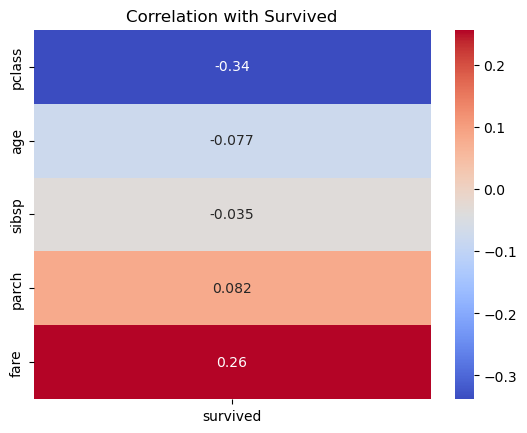

In [61]:
#Focus on correlation with target
df=df.select_dtypes(include=['number'])
correlation_with_target = df.corr(method='pearson')['survived'].drop('survived')
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation with Survived')
plt.show()

#### Boxplot
Numerical vs. Categorical

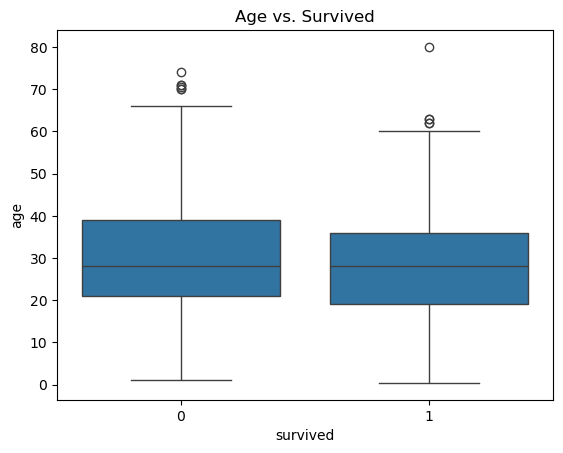

In [52]:
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age vs. Survived')
plt.show()

#### Grouped Bar Plots for Categorical Variables
Compare the distribution of a categorical variable across another categorical variable.

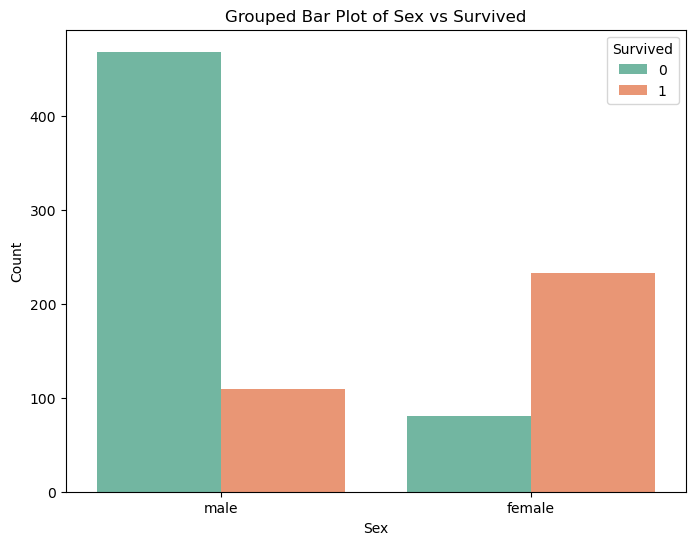

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=df, palette='Set2')
plt.title('Grouped Bar Plot of Sex vs Survived')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

#### Stacked Bar Plots for Categorical Variables
Show the proportion of one categorical variable within another

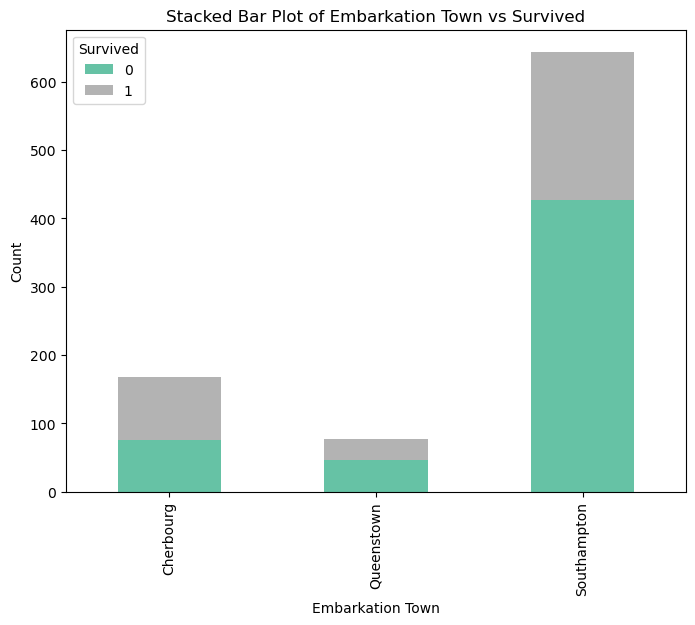

In [31]:
# Create a cross-tabulation of embark_town and survived
embark_survived = pd.crosstab(df['embark_town'], df['survived'])

# Plot the stacked bar plot
embark_survived.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
plt.title('Stacked Bar Plot of Embarkation Town vs Survived')
plt.xlabel('Embarkation Town')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

## Multivariate Analysis

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

#### Pairplots
Great way to visualize relationships between multiple numerical variables in a dataset. The diagonal shows the distribution of each variable and the off-diagonal plots show scatterplots of pairwise relationships. Look for patterns, clusters, or outliers in the scatterplots.

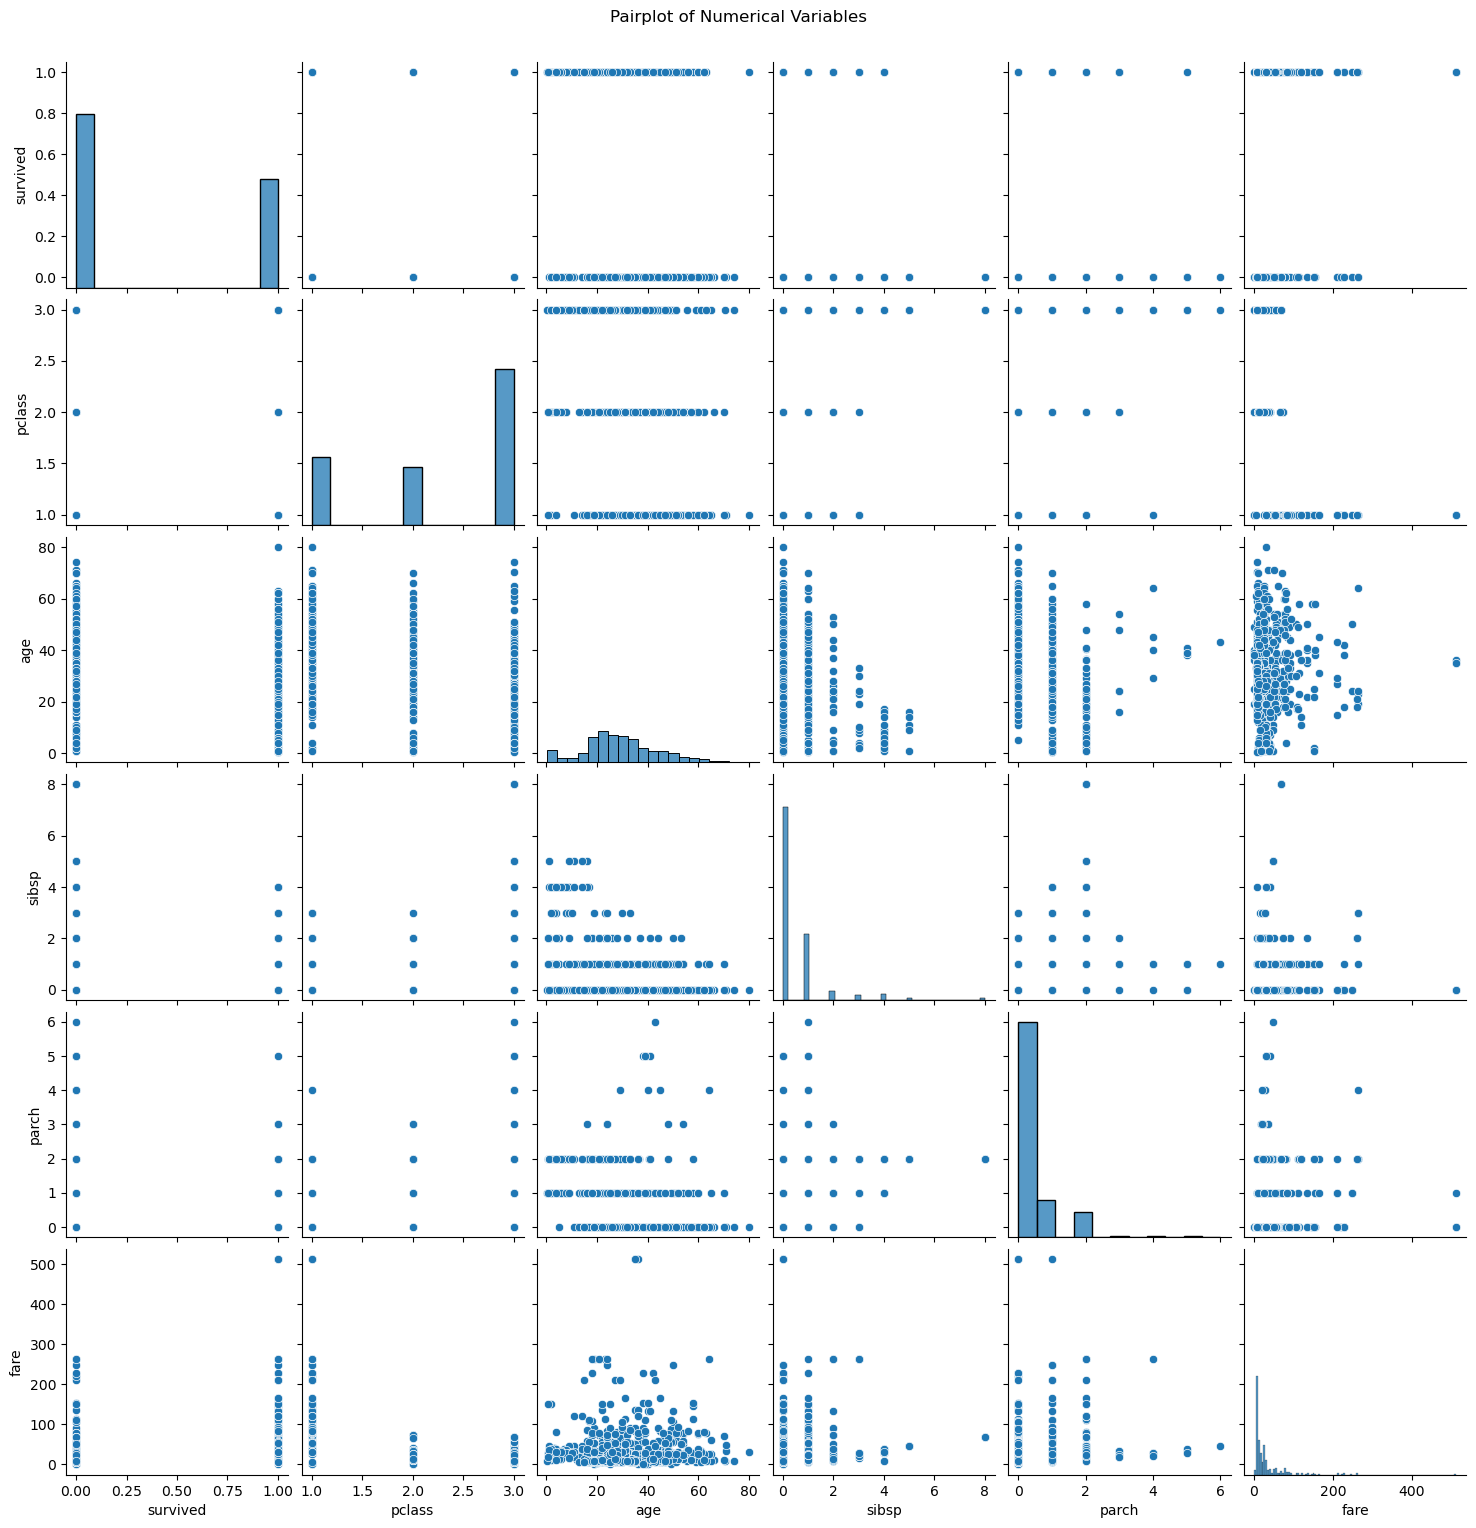

In [40]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Create a pairplot
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

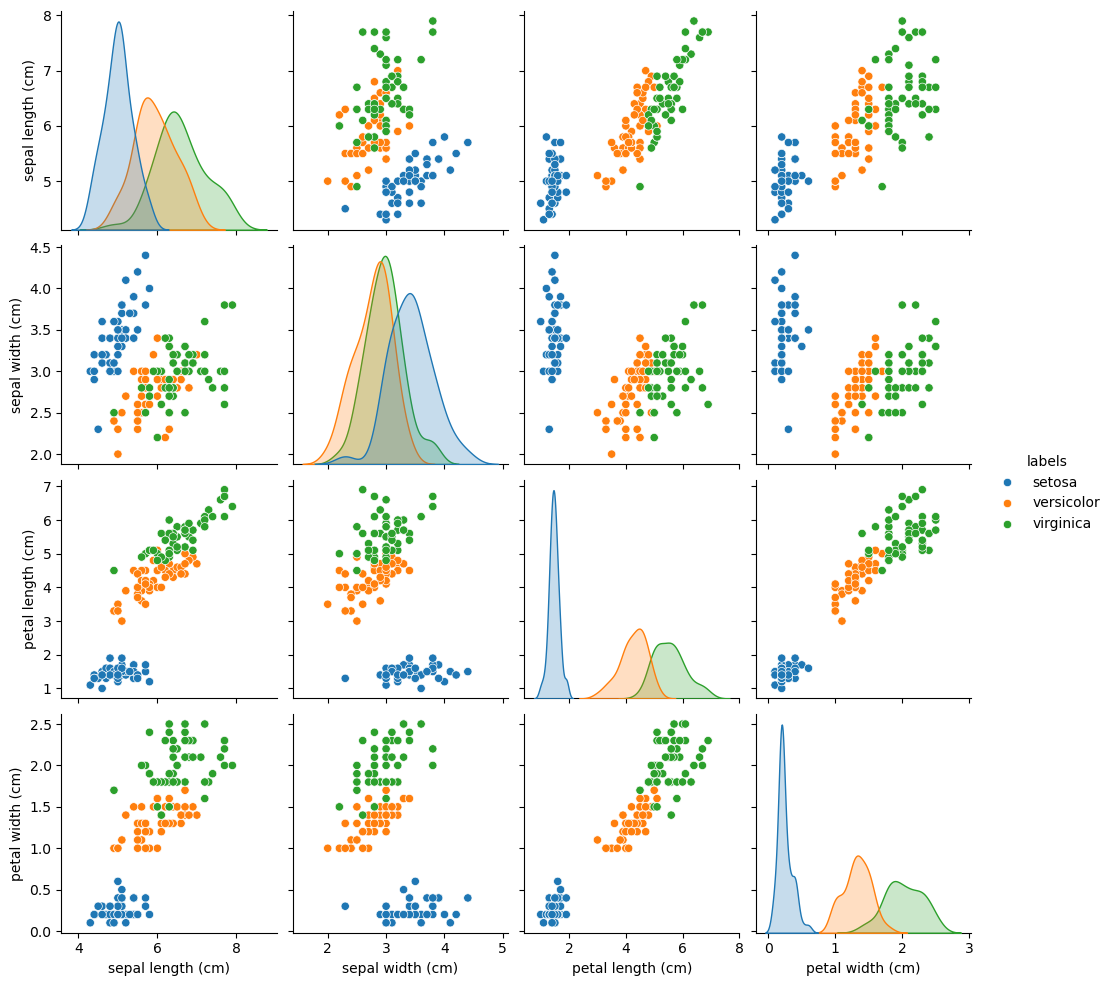

In [44]:

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing, pipeline, datasets



iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target_names[iris.target]


def plot_data(X, y):
        
    df = pd.DataFrame(X.values, columns=X.columns)
    df['labels'] = y
    
    _ = sns.pairplot(df, hue='labels')  #Generates a grid of scatterplots showing the relationships between all pairs.Colors the points in the scatterplots based on the values in the 'labels'.Helps identify which features are most useful for separating classes.

plot_data(X, y)

#### 3D Scatterplots

In [41]:
import plotly.express as px

# Create a 3D scatterplot
fig = px.scatter_3d(df, x='age', y='fare', z='parch', color='survived',
                    title='3D Scatterplot: Age, Fare, and Parch')
fig.show()

####  Faceted Plots
Allow you to create multiple subplots based on a categorical variable

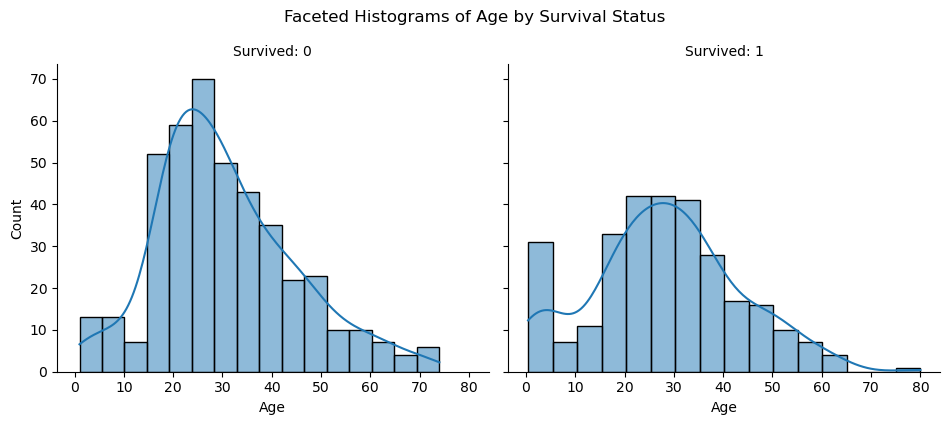

In [42]:
# Create faceted histograms for age, grouped by survival status
g = sns.FacetGrid(df, col='survived', height=4, aspect=1.2)
g.map(sns.histplot, 'age', kde=True)
g.set_axis_labels('Age', 'Count')
g.set_titles('Survived: {col_name}')
plt.suptitle('Faceted Histograms of Age by Survival Status', y=1.05)
plt.show()